In [33]:
#Autores: David Valencia, Karla Salas con ayuda del profesor Mijangos
from os import listdir
from os.path import isfile, join
#Para ver las palabras
from collections import Counter
import matplotlib.pyplot as plt
# nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords #Listas de stopwords
from nltk.tokenize import word_tokenize#Tokens
import re #regex
from tqdm import tqdm #Medir el progreso del entrenamiento
import json
from wordcloud import WordCloud
import pandas as pd

[nltk_data] Downloading package punkt to /home/karla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/karla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Limpiamos y tokenizamos

In [2]:
def get_txt(path):
    """
    Regresa una lista con el contenido de todos los archivos de un directorio

    Args:
        path (str): ruta de la carpeta
    """
    text = []
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    
    for file in onlyfiles:
        with open(path+"/"+file, 'rb') as f:
            text.append(json.loads(f.read().decode('utf-8', 'replace')))
    return text

# Guardamos los subtitulos de todos los canales
videos = get_txt("../corpus/data")#Nota: no print de todo

In [5]:
videos[0][0]['subtitles']

[{'start': '13.596', 'dur': '1.752', 'text': '¿Adónde vas, Momo?'},
 {'start': '15.432', 'dur': '1.334', 'text': '¡Eres débil!'},
 {'start': '17.934', 'dur': '2.961', 'text': '¿Crees que podrás sobrevivir'},
 {'start': '20.937',
  'dur': '2.294',
  'text': 'si no cumples las reglas de esta sociedad?'},
 {'start': '27.485',
  'dur': '3.337',
  'text': 'Nos han vencido.\nNo encontramos su guarida.'},
 {'start': '30.905',
  'dur': '3.712',
  'text': 'Han bombardeado el Área B.\n¡Estamos en fuego cruzado, comandante!'},
 {'start': '36.327', 'dur': '1.001', 'text': 'Iré enseguida.'},
 {'start': '39.456',
  'dur': '3.169',
  'text': 'Es el momento.\nHoy por fin vengaremos a nuestra familia.'},
 {'start': '43.209',
  'dur': '2.628',
  'text': '¡Destruiremos la miserable torre de luz'},
 {'start': '45.92', 'dur': '2.169', 'text': 'y masacraremos a los humanos!'},
 {'start': '53.97',
  'dur': '2.377',
  'text': '¡A ellos! ¡Maten a los vampiros!'},
 {'start': '56.765', 'dur': '1.293', 'text': '¡

In [35]:
# tokens que necesitan ser limpiados del corpus y que no
# se encuentran en la lista de stopwords
more = ["si", "bien", "ahora", "así", "aquí", "pues"]
stopwords_list = stopwords.words('spanish') + more

def get_tokens_clean(text):
    '''
    Genera los tokens de una cadena y los limpia
    (quita símbolos raros y stopwords)
    
    Args:
        text (str): cadena
    '''
    tokens = word_tokenize(text)
    clean = []
    pattern = r'[-_{}(),;:"#\/.¡!¿?·\[\]\'`]'
    for w in tokens:
        #quita stopwords y convierte a minúsculas
        w = re.sub(pattern,'', w.lower())
        if w not in stopwords_list and w != '':
            clean.append(w)

    return clean

In [36]:
def merge_videos(corpus):
    '''
    Mezcla el corpus de cada película en una entrada del
    diccionario movies en un solo corpus, 
    guarda los diálogos por línea tokenizados y limpios

    Args:
        col (dic): Diccionario con los diálogos
    '''
    corpus_clean = []
    #Iteramos sobre los canales
    for chanel in tqdm(corpus):
        for video in chanel:
            #Cada texto se guarda por oraciones
            if 'subtitles' in video:
                corpus_clean += [get_tokens_clean(s['text']) for s in video['subtitles']]
    return corpus_clean

all_videos = merge_videos(videos)

100%|█████████████████████████████████████████████| 9/9 [01:31<00:00, 10.21s/it]


In [37]:
all_videos[0]

['adónde', 'vas', 'momo']

In [38]:
def flatten(lst):
    return [item for sub in lst for item in sub]

In [39]:
def show_words(corpus):
    '''
    Usa la librería wordcloud para mostrar una gráfica
    de las palabras más usadasen un corpus

    Args:
        word (str): lista de palabras
    '''
    word = flatten(corpus)
    mycloud = WordCloud()
    mycloud.generate_from_frequencies(Counter(word))

    plt.figure(figsize=(8,6), dpi=120)
    plt.imshow(mycloud)
    plt.axis("off")
    plt.show()

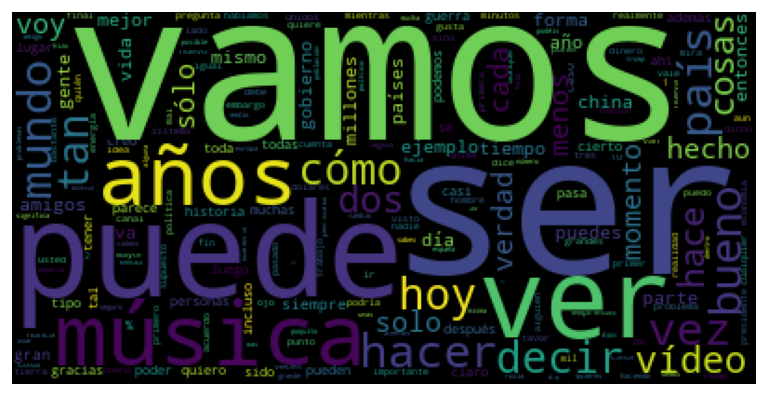

In [40]:
show_words(all_videos)

In [41]:
frequencies = Counter(flatten(all_videos))
term_list = pd.DataFrame(sorted(frequencies.items(), key=itemgetter(1), reverse=True), 
                         columns=['Token','Frequency'])

term_list = term_list.set_index(term_list['Token'])
term_list.pop('Token')
term_list

,Frequency
Token,
vamos,9182
ser,8532
puede,7372
ver,7341
música,7142
...,...
luso,1
ob,1
colaboraré,1


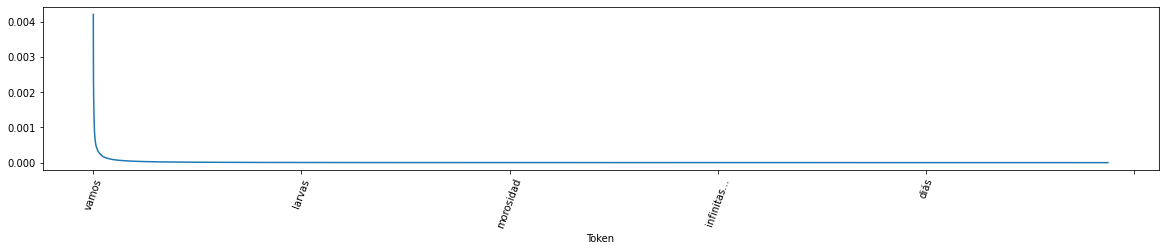

In [42]:
#Calcular probabilidad
term_list['Probability'] = term_list/term_list.sum()

#Visualizar las probabilidades
term_list['Probability'].sort_values(ascending=False).plot(figsize=(20,3), rot=70)
plt.show()

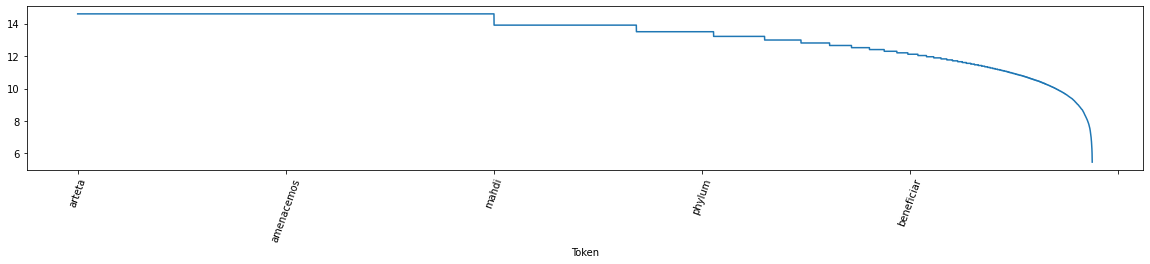

In [43]:
#Calcular información
term_list['Information'] = -np.log(term_list['Probability'])

#Visualizar la información
term_list['Information'].sort_values(ascending=False).plot(figsize=(20,3), rot=70)
plt.show()

In [44]:
#Correlación de valores
term_list.corr()


,Frequency,Probability,Information
Frequency,1.00000,1.00000,-0.42595
Probability,1.00000,1.00000,-0.42595
Information,-0.42595,-0.42595,1.00000


No haremos el análisis de representatividad debido a que el corpus no está dividido por categorías y aunque los vídeos están divididos por canales, la mayoría de estos tratan temas diversos entre ellos.